In [20]:
from osgeo import gdal
import pylab
import os
import numpy as np

In [5]:
folder_data = './data/'
file_data_list = ['lizard_bathy.tif', 'liz_2009_qb.tif']
gtif_list = []

for _file in file_data_list:
    gtif_list.append(gdal.Open(os.path.join(folder_data, _file)))


In [9]:
band_list = []

# from the single band image

try:
    srcband = gtif_list[0].GetRasterBand(1)
    band_list.append(srcband.ReadAsArray())
except RuntimeError as e:
    # for example, try GetRasterBand(10)
    print('Band ( %i ) not found' % band_num)
    print(e)
    sys.exit(1)

for b in range(3):
    try:
        srcband = gtif_list[1].GetRasterBand(b + 1)
    except RuntimeError as e:
        # for example, try GetRasterBand(10)
        print('Band ( %i ) not found' % b)
        print(e)
        sys.exit(1)

    band_list.append(srcband.ReadAsArray())



In [10]:
print(len(band_list))

4


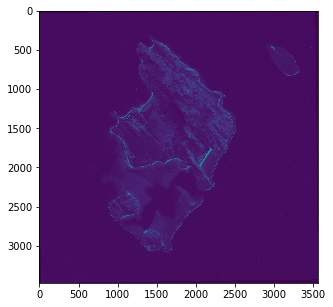

In [31]:
pylab.figure(figsize=(5, 5))
pylab.imshow(band_list[3])

In [41]:
print(band_list[1].shape)
shape = band_list[2].shape

(3475, 3560)


In [26]:
merged_array = np.zeros((4, band_list[0].shape[0], band_list[0].shape[1]))

for ii, band in enumerate(band_list):
    merged_array[ii, :, :] = band[:, :]

In [27]:
merged_array.shape

(4, 3475, 3560)

In [28]:
np.save('lizard_merged.pk', merged_array)

## Save out the labels as numpy array

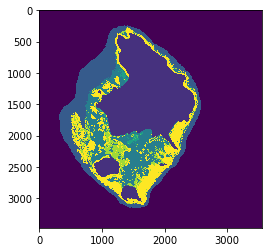

In [39]:
folder_data = './data/'
_file = 'lizard_habitat_hires_2011.tif'


gtif = gdal.Open(os.path.join(folder_data, _file))
    
srcband = gtif.GetRasterBand(1)
b = srcband.ReadAsArray()

pylab.imshow(b)

In [40]:
np.save('label_array', b)